In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import glob
import data_loading
import eval
import partitioning
import impact


In [123]:
# load sample lobster data
message_paths = sorted(glob.glob('/data1/sascha/data/raw/TSLA*message*.csv'))
book_paths = sorted(glob.glob('/data1/sascha/data/raw/TSLA*orderbook*.csv'))
# message_paths = glob.glob('/homes/80/kang/AlphaTrade/testing_oneDay/data/*message*.csv')
# book_paths = glob.glob('/homes/80/kang/AlphaTrade/testing_oneDay/data/*orderbook*.csv')
print(message_paths)
print(book_paths)
# 

['/data1/sascha/data/raw/TSLA_2015-01-02_34200000_57600000_message_10.csv', '/data1/sascha/data/raw/TSLA_2015-01-05_34200000_57600000_message_10.csv', '/data1/sascha/data/raw/TSLA_2015-01-06_34200000_57600000_message_10.csv', '/data1/sascha/data/raw/TSLA_2015-01-07_34200000_57600000_message_10.csv', '/data1/sascha/data/raw/TSLA_2015-01-08_34200000_57600000_message_10.csv']
['/data1/sascha/data/raw/TSLA_2015-01-02_34200000_57600000_orderbook_10.csv', '/data1/sascha/data/raw/TSLA_2015-01-05_34200000_57600000_orderbook_10.csv', '/data1/sascha/data/raw/TSLA_2015-01-06_34200000_57600000_orderbook_10.csv', '/data1/sascha/data/raw/TSLA_2015-01-07_34200000_57600000_orderbook_10.csv', '/data1/sascha/data/raw/TSLA_2015-01-08_34200000_57600000_orderbook_10.csv']


In [124]:
m = data_loading.load_message_df(message_paths[0])
b = data_loading.load_book_df(book_paths[0])

# DATA FORMAT:

# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_cond 
# total 78472
# -rw-rw-rw-  1 peer  staff   6094817 Apr 10 14:13 GOOG_2012-06-21_34200000_57600000_message_real_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr 10 14:13 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_10.csv
# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_gen 
# total 156912
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:06 GOOG_2012-06-21_34200000_57600000_message_real_id_0_gen_id_0_10.csv
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:07 GOOG_2012-06-21_34200000_57600000_message_real_id_0_gen_id_1_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:06 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_gen_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:07 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_gen_id_1_10.csv
# (base) peer@Peers-MacBook-Pro lob_bench % ls -l data_test_real 
# total 78472
# -rw-rw-rw-  1 peer  staff   6094817 Apr  4 18:04 GOOG_2012-06-21_34200000_57600000_message_real_id_0_10.csv
# -rw-rw-rw-  1 peer  staff  34073243 Apr  4 18:04 GOOG_2012-06-21_34200000_57600000_orderbook_real_id_0_10.csv

In [125]:
root_path="/data1/sascha/data/GOOG/"




loader = data_loading.Simple_Loader(
            real_data_path= root_path+"data_real",
            gen_data_path= root_path+"data_gen",
            cond_data_path=root_path+"data_cond",
)

In [126]:
s=loader[0]
s.b_real.tail(20)

(<function Simple_Loader.__getitem__.<locals>.<genexpr>.<lambda> at 0x7f6dd7190430>,)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
80,895600,300,895500,200,895700,626,895400,202,895800,568,...,894800,327,896400,651,894700,371,896500,1574,894600,601
81,895600,300,895500,100,895700,626,895400,202,895800,568,...,894800,327,896400,651,894700,371,896500,1574,894600,601
82,895600,300,895400,202,895700,626,895300,148,895800,568,...,894700,371,896400,651,894600,601,896500,1574,894500,521
83,895600,300,895400,202,895700,626,895300,148,895800,568,...,894700,371,896400,651,894600,601,896500,1574,894500,521
84,895600,300,895400,202,895700,626,895300,148,895800,568,...,894700,371,896400,651,894600,601,896500,1574,894500,521
85,895600,300,895400,202,895700,601,895300,148,895800,568,...,894700,371,896400,651,894600,601,896500,1574,894500,521
86,895600,300,895400,202,895700,601,895300,148,895800,568,...,894700,371,896400,651,894600,601,896500,1574,894500,521
87,895600,300,895400,202,895700,601,895300,148,895800,568,...,894700,371,896400,651,894600,601,896500,1574,894500,521
88,895600,200,895400,202,895700,601,895300,148,895800,568,...,894700,371,896400,651,894600,601,896500,1574,894500,521
89,895600,100,895400,202,895700,601,895300,148,895800,568,...,894700,371,896400,651,894600,601,896500,1574,894500,521


In [127]:
m,b=impact.filter_touch_events(m,b)



In [128]:
m

,time,event_type,order_id,size,price,direction
2,34200.034289918,1,5519048,11,2227500,1
33,34200.352703503,4,5519048,1,2227500,1
34,34200.352821417,4,5519048,10,2227500,1
35,34200.35290759,1,7481533,100,2229000,-1
36,34200.403006071,3,7481533,100,2229000,-1
...,...,...,...,...,...,...
216704,57599.947752098,3,267973922,100,2191900,1
216706,57599.977909841,4,267961846,39,2193100,-1
216707,57599.977909841,4,267963915,61,2193100,-1
216708,57599.977975337,1,267983787,100,2191900,1


In [129]:
df=impact.classify_event_types(m,b)
df

,time,event_type,order_id,size,price,direction,0,1,2,3,...,36,37,38,39,askprice_diff,bidprice_diff,bouchaud_event,eps,s,midprice
2,34200.034289918,1,5519048,11,2227500,1,2229100,1507,2227500,11,...,2257500,40,2200000,97,NaN,NaN,LO_1,1,-1,2228300
33,34200.352703503,4,5519048,1,2227500,1,2229100,1507,2227500,10,...,2242500,20,2224000,42,0.0,0.0,MO_0,-1,1,2228300
34,34200.352821417,4,5519048,10,2227500,1,2229100,1507,2226400,300,...,2242500,20,2222200,201,0.0,-1100.0,MO_1,-1,1,2227750
35,34200.35290759,1,7481533,100,2229000,-1,2229000,100,2226400,300,...,2241000,100,2222200,201,-100.0,0.0,LO_1,-1,1,2227700
36,34200.403006071,3,7481533,100,2229000,-1,2229100,1507,2226400,300,...,2242500,20,2222200,201,100.0,0.0,CA_1,1,1,2227750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216704,57599.947752098,3,267973922,100,2191900,1,2193100,639,2191900,1000,...,2196000,2200,2190600,100,0.0,0.0,CA_0,-1,-1,2192500
216706,57599.977909841,4,267961846,39,2193100,-1,2193100,600,2191900,1000,...,2196000,2200,2190500,200,0.0,0.0,MO_0,1,-1,2192500
216707,57599.977909841,4,267963915,61,2193100,-1,2193100,539,2191900,1000,...,2196000,2200,2190500,200,0.0,0.0,MO_0,1,-1,2192500
216708,57599.977975337,1,267983787,100,2191900,1,2193100,539,2191900,1100,...,2196000,2200,2190500,200,0.0,0.0,LO_0,1,-1,2192500


[0.38976661859184475, 0.38976661859184475, 0.38976661859184475, 0.38976661859184475, 0.30417110546586906, 0.25948143049136263, 0.25948143049136263, 0.2140890316659018, 0.19837406369343233, 0.19357482379937715, 0.1638336584326389, 0.15285632325219245, 0.1376676174551654, 0.12744680153447654, 0.10804695697796432, 0.08949594989013872, 0.08022565515431795, 0.07336755949940131, 0.06106244052892345, 0.06285076635268634, 0.04460167112628659, 0.04654141759180188, 0.04917925039846202, 0.0446578315630241, 0.05361550867261297, 0.036523286272054825, 0.04346821953512925, 0.03701500429638443, 0.04217795220825674, 0.02867675140726965, 0.035006748088041724, 0.033819173680951824, 0.028620463378930896, 0.021686828640168073, 0.029159402454449115, 0.022936651974764497, 0.018234097762816467, 0.022104774488447665, 0.021240038020033634, 0.023627388175000943, 0.01511260952231609, 0.021722970182539027, 0.0193274148198986, 0.020869353464020454, 0.007883227945068108, 0.009423371321653343, 0.005705663224407035, -

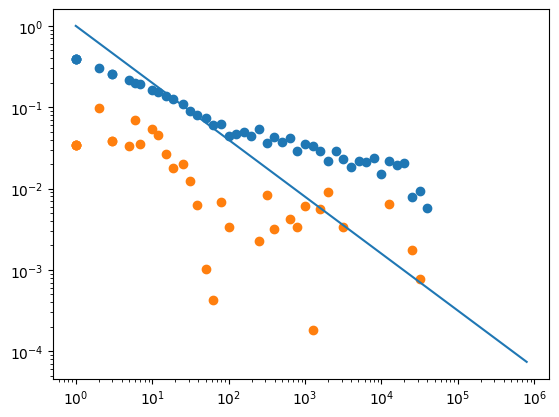

In [137]:
x=(10** np.arange(0,6,step=0.1)).astype(int)
import matplotlib.pyplot as plt
y=[impact.sign_autocorr(i,df['s']) for i in x]
z=[impact.sign_autocorr(i,df['eps']) for i in x]
print(y)
plt.scatter(x,y)
plt.scatter(x,z)
plt.loglog(x,np.power(x,-0.7))
ax.set_yscale('log')
ax.set_xscale('log')


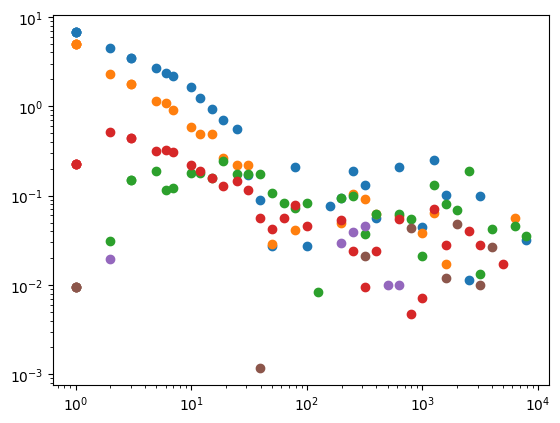

In [91]:
x=(10** np.arange(0,4,step=0.1)).astype(int)

fig = plt.figure()
ax = plt.gca()
import matplotlib.pyplot as plt
for event2 in ['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1']:
    y=[impact.event_cross_corr('MO_0',event2,i,df) for i in x]
    ax.scatter(x,y)
ax.set_yscale('log')
ax.set_xscale('log')



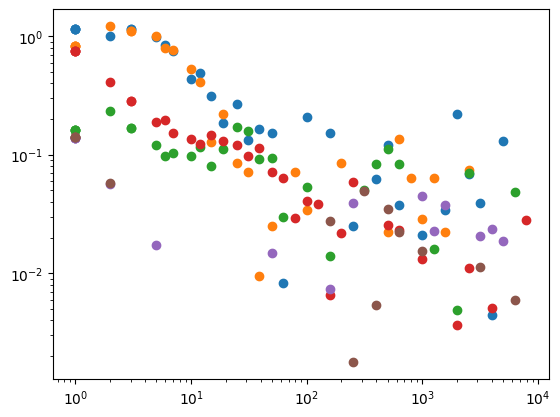

In [90]:
x=(10** np.arange(0,4,step=0.1)).astype(int)

fig = plt.figure()
ax = plt.gca()
import matplotlib.pyplot as plt
for event2 in ['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1']:
    y=[impact.event_cross_corr('MO_1',event2,i,df) for i in x]
    ax.scatter(x,y)
ax.set_yscale('log')
ax.set_xscale('log')



[5.8643948707354845, 5.8643948707354845, 5.8643948707354845, 5.8643948707354845, 3.7048099675827473, 2.773764435356185, 2.773764435356185, 2.046557274090468, 1.798645741840791, 1.660917112813193, 1.1706031934749443, 0.928200806386372, 0.8180179031642936, 0.5535789354313054, 0.509505774142474, 0.448905177370331, 0.3662679999537719, 0.3827954354370837, 0.38830458059818773, 0.3552497096315643, 0.2946491128594211, 0.2946491128594211, 0.38830458059818773, 0.04122843544864074, 0.11284732254299179, 0.06877416125416036, 0.03571929028753695, -0.16260993551220426, 0.046737580609744755, 0.05775587093195256, -0.0524270322901258, 0.14590219350961542, 0.14590219350961542, -0.11853677422337294, -0.008353871001294477, -0.20117395163993168, -0.013863016162398267, -0.05793617745122981, -0.2342288226065551, -0.30033856453980223]
[4.070519875969161, 4.070519875969161, 4.070519875969161, 4.070519875969161, 1.5041142385007409, 1.0971437652452303, 1.0971437652452303, 0.6527984526091124, 0.557284974192003, 0.

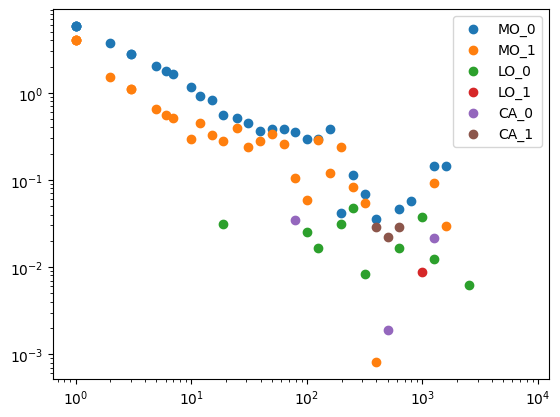

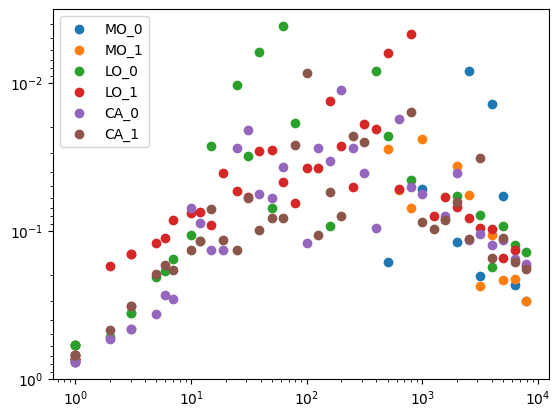

In [98]:
x=(10** np.arange(0,4,step=0.1)).astype(int)

fig = plt.figure()
ax = plt.gca()
import matplotlib.pyplot as plt
for event2 in ['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1']:
    y=[impact.u_event_corr('MO_0',event2,i,df) for i in x]
    print(y)
    ax.scatter(x,y)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1'])

fig = plt.figure()
ax = plt.gca()
import matplotlib.pyplot as plt
for event2 in ['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1']:
    y=[-impact.u_event_corr('MO_0',event2,i,df) for i in x]
    ax.scatter(x,y)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.invert_yaxis()
ax.legend(['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1'])


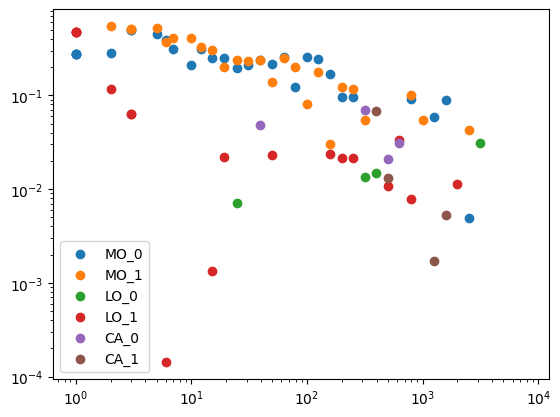

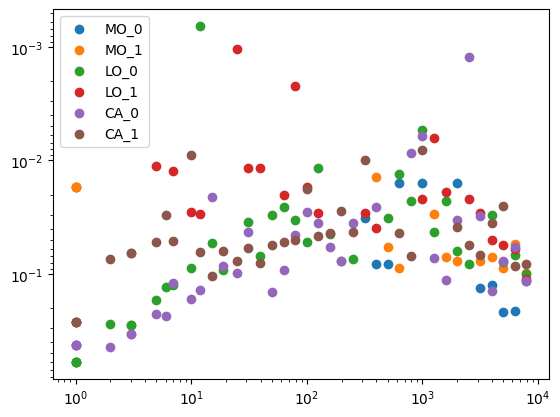

In [100]:
x=(10** np.arange(0,4,step=0.1)).astype(int)

fig = plt.figure()
ax = plt.gca()
import matplotlib.pyplot as plt
for event2 in ['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1']:
    y=[impact.u_event_corr('MO_1',event2,i,df) for i in x]
    ax.scatter(x,y)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1'])

fig = plt.figure()
ax = plt.gca()
import matplotlib.pyplot as plt
for event2 in ['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1']:
    y=[-impact.u_event_corr('MO_1',event2,i,df) for i in x]
    ax.scatter(x,y)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.invert_yaxis()
ax.legend(['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1'])

[-120.37259615384616, -120.37259615384616, -120.37259615384616, -120.37259615384616, -196.03365384615384, -257.67959122332434, -257.67959122332434, -331.87011425135296, -364.4618159951894, -390.3337342152736, -455.5021046301864, -491.69924812030075, -527.9482551143201, -546.3253012048193, -602.0481927710844, -661.8825301204819, -699.5783132530121, -703.9006024096385, -730.3496081977095, -761.6289592760181, -786.6515837104073, -780.6461352657005, -688.7881535207011, -734.3475628216772, -779.3484848484849, -885.8787878787879, -881.439393939394, -837.089914945322, -981.3394216133942, -1046.1408882082694, -963.0769230769231, -1166.7654398003742, -1431.2599174865122, -1760.9791332263242, -1747.5803832413121, -2103.6152570480926, -1944.0814231953473, -2114.62361878453, -2654.5260915867943, -3276.799557032115]
[-46.53454133635334, -46.53454133635334, -46.53454133635334, -46.53454133635334, -88.90147225368064, -120.11325028312571, -120.11325028312571, -165.039637599094, -181.34767836919593, -1

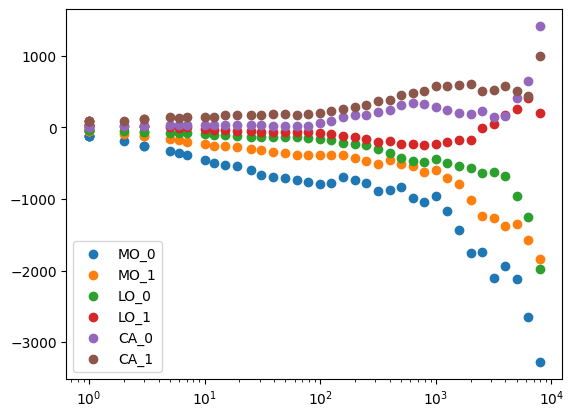

In [136]:
x=(10** np.arange(0,4,step=0.1)).astype(int)

fig = plt.figure()
ax = plt.gca()
import matplotlib.pyplot as plt
for event in ['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1']:
    y=[impact.response_func(event,i,df) for i in x]
    print(y)
    ax.scatter(x,y)
    
ax.set_xscale('log')
ax.legend(['MO_0','MO_1','LO_0','LO_1','CA_0','CA_1'])

In [ ]:
impact_msgs, impact_books=impact.filter_sequence_for_impact(m,b,ordersize=(1100,1300),orderside=1,sequence_length=1000,timestamp=('34200.034289918','34900.134289918'))
print(impact_msgs)

In [ ]:
eval.time_to_first_fill(m).mean()

In [ ]:
eval.time_to_cancel(m).mean()

In [ ]:
eval.l1_volume(m, b)

In [ ]:
eval.total_volume(m, b, 1)

In [ ]:
eval.limit_order_depth(m, b)


In [ ]:
eval.cancellation_depth(m, b)

In [ ]:
eval._order_levels(m, b, (1,2,3))

In [ ]:
eval.cancel_order_levels(m, b)

In [ ]:
eval.spread(b)

In [ ]:
ret = eval.mid_returns(m, b, '1min')
ret

In [ ]:
eval.time_to_first_fill(m)

In [ ]:
eval.autocorr(ret)

In [ ]:
eval.autocorr(ret**2, 10, alpha=None)

In [ ]:
eval.l1_volume(m, b)

In [ ]:
eval.total_volume(m, b, 2)

In [ ]:
eval.limit_order_depth(m_real, b_real)

In [ ]:
# DEPRECATED
# eval.compute_metrics(loader)

In [ ]:
s=loader

In [ ]:
s = loader[0]

In [ ]:
for i in loader:
    print(i)

In [ ]:
ask_lvls, bid_lvls = eval.limit_order_levels(m_real, b_real)

In [ ]:
ask_lvls

In [ ]:
m_real

In [ ]:
b_real

In [ ]:
mid = eval.mid_price(m_real, b_real)
mid

In [ ]:
book_real_3d = eval.compute_3d_book_changes(m_real, b_real)
book_real_3d


# TODO: bin this data for all dimensions separately and then compute the L1 norm of the distributions

In [ ]:
book_real_3d_groups, bins = eval.compute_3d_book_groups(book_real_3d, 5)
book_real_3d_groups


In [ ]:
value_counts = book_real_3d_groups.value_counts()
value_counts

In [ ]:
bins

In [ ]:
# TODO: get the values from value_counts and match them to the right bins
#       also compute the L1 norm of the distributions

In [ ]:
value_counts.sort_index().values.shape

In [ ]:
values.shape

In [ ]:
import matplotlib.pyplot as plt


# X, Y, Z = np.meshgrid([-10,0,10], [-10,0,10], [-10,0,10])
X, Y, Z = np.meshgrid(*bins)
values = 2*X*X - Y*Y + 1/(Z*Z+1)
# values = value_counts.sort_index().values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c=values, cmap='viridis', marker='s', alpha=0.5, s=200)
fig.colorbar(scatter, ax=ax)

plt.show()

In [ ]:
# compute 3d book tuples for all real data samples
book_real_3d = pd.concat(partitioning.score_real(loader, eval.compute_3d_book_changes))
book_real_3d.dropna().hist()

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(book_real_3d['mid_change'], book_real_3d['price'], book_real_3d['size'])

ax.set_xlabel('Mid Change')
ax.set_ylabel('Price')
ax.set_zlabel('Size')

plt.show()

In [ ]:
eval.mid_returns(m_real, b_real)

In [ ]:
m_real.iloc[1163]

In [ ]:
b_real.iloc[1163]

In [ ]:
eval.autocorr(eval.mid_returns(m_real, b_real, '1min'), 4)
# eval.mid_returns(m_real, b_real, '5min')

In [ ]:
eval._order_levels(m_real, b_real, (2,3))

In [ ]:
cnl_lvl_ask, cnl_lvl_bid = eval.cancel_order_levels(m_real, b_real)

In [ ]:
eval.mean_per_interval(cnl_lvl_ask, "5min")

## Library Use Cases

In [ ]:
from data_loading import Simple_Loader, Lobster_Sequence, Lazy_Tuple

In [ ]:
# loader = data_loading.Simple_Loader('data_test_real', 'data_test_gen', 'data_test_cond')
loader = data_loading.Simple_Loader('data_saved/GOOG/data_real', 'data_saved/GOOG/data_gen', 'data_saved/GOOG/data_cond')
s = loader[0]
# s.materialize()

In [ ]:
s.m_real

In [ ]:
partitioning.score_real(loader, lambda x, y: 1)

In [ ]:
scores = partitioning.score_real(
    tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader),
    lambda m, b: m.time.diff().mean()
)
scores

In [ ]:
scores = partitioning.score_cond(
    loader, 
    lambda m, b: m.time.diff().mean()
)

In [ ]:
scores

In [ ]:
subseq = partitioning.get_subseqs(s, subseq_len=1000)
len(subseq.m_real)

In [ ]:
s.m_gen[0]

In [ ]:
subseq = partitioning.get_subseqs(loader[0], time_interval='5min')

In [ ]:
# Example of how grouping works

partitioning.group_by_score(
    scores_real=[9, 10, 9.5, 9, 8, 11, 5.5],
    scores_gen=[8, 10, 9.5, 9, 8, 11, 5.5, 1, 1, 1, 2, 3, 6],
    n_bins=4
)

In [ ]:
# ..using subsequences

partitioning.group_by_score(
    scores_real=[[9, 10], [9.5, 9], [8, 11, 5.5]],
    scores_gen=[[[8, 10, 9.5], [9, 8, 11]], [[5.5, 1, 1], [1, 2, 3, 6]]],
    quantiles=[0.2, 0.5, 0.8]
)

In [ ]:
loader

In [ ]:
import metrics
import plotting

In [ ]:
# unconditional comparison of distributions (of 10 min intervals)

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

# compare distributions of scores
metrics.wasserstein(scores_real, scores_gen)

# print(scores_real)
# print(scores_gen)

In [ ]:
plotting.hist(scores_real, scores_gen)

In [ ]:
groups[0]

In [ ]:
# comparison conditional on time of day (which subsequence part)

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

# enumerate groups for each subseq for each real and gen. sequence
groups_real, groups_gen = partitioning.group_by_subseq(subseqs)
score_df = partitioning.get_score_table(scores_real, scores_gen, groups_real, groups_gen)

score_df

In [ ]:
# print entire score table
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(score_df)

In [ ]:
group_counts = score_df.groupby(['type', 'group']).count()
group_counts = pd.merge(group_counts.loc['real'], group_counts.loc['generated'], on='group')
(group_counts.score_x - group_counts.score_y).abs().mean()

In [ ]:
def l1_by_group(score_df: pd.DataFrame) -> float:
    """
    Takes a "score dataframe" with columns score (real numbers), group (+int), type ("real" or "generated")
    Returns the mean L1 distance between the number of scores in each group for the real and generated data.
    """
    group_counts = score_df.groupby(['type', 'group']).count()
    group_counts = pd.merge(group_counts.loc['real'], group_counts.loc['generated'], on='group')
    return (group_counts.score_x - group_counts.score_y).abs().mean()
l1_by_group(score_df)

In [ ]:
l1_by_group(score_df)

In [ ]:
score_df.type.unique()

In [ ]:
plotting.line(score_df, '', 'time interval', 'spread')

In [ ]:
b_real=loader[0].b_real
m_real=loader[0].m_real
columns = [item for i in range(1,11) for item in (f"askPrice{i}", f"askQuant{i}", f"bidPrice{i}", f"bidQuant{i}")]
b_real.columns=columns
b_real['mid_price']=(b_real['askPrice1']*b_real['askQuant1']+b_real['bidPrice1']*b_real['bidQuant1'])/(b_real['askQuant1']+b_real['bidQuant1'])
b_real['delta_mid_price']=b_real['mid_price'].diff().fillna(0)
b_real

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
idx = 2
delta_mid_price = b_real.iloc[idx,-1]
lb_array=b_real.iloc[idx-1,:40].values.reshape(20,2)
b_array=b_real.iloc[idx,:40].values.reshape(20,2)
lb_unique = np.array([x for x in lb_array if not any(np.array_equal(x, y) for y in b_array)])
b_unique = np.array([x for x in b_array if not any(np.array_equal(x, y) for y in lb_array)])
first_lb_unique=lb_unique[0];first_b_unique=b_unique[0]
index = np.where(b_array[:, 0] == first_b_unique[0])[0][0]
quant = np.where(first_b_unique[0] == first_lb_unique[0], first_b_unique[1] - first_lb_unique[1], first_b_unique[1])
result = np.array([delta_mid_price,index,quant])

In [ ]:
b_real['delta_mid_price'].plot()

In [ ]:
def ob3Drepr(orderbook, row_index):
    price_level = 10
    delta_mid_price = b_real.iloc[row_index,-1]
    lb_array=b_real.iloc[row_index-1,:4*price_level].values.reshape(2*price_level,2)
    b_array=b_real.iloc[row_index,:4*price_level].values.reshape(2*price_level,2)
    lb_unique = np.array([x for x in lb_array if not any(np.array_equal(x, y) for y in b_array)])
    b_unique = np.array([x for x in b_array if not any(np.array_equal(x, y) for y in lb_array)])
    first_lb_unique=lb_unique[0];first_b_unique=b_unique[0]
    index = np.where(b_array[:, 0] == first_b_unique[0])[0][0]
    quant = np.where(first_b_unique[0] == first_lb_unique[0], first_b_unique[1] - first_lb_unique[1], first_b_unique[1])
    result = np.array([delta_mid_price,index,quant])

In [ ]:
# calculate scores of entire real and generated data (here by the spread),
# and group each subsequence into a bin based on the score
# for each of these bins, calculate the distribution of a statistic of interest (e.g. autocorrelation of mid returns)

scoring_fn = lambda m, b: eval.spread(m, b).mean()
scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)
groups_real, groups_gen = partitioning.group_by_score(
    scores_real, scores_gen,
    # n_bins=5,
    quantiles=[0.25, 0.5, 0.75],
)
score_df = partitioning.get_score_table(scores_real, scores_gen, groups_real, groups_gen)

eval_fn = lambda m, b: eval.autocorr(eval.mid_returns(m, b, interval='1min'), 1)[1]
eval_real, eval_gen = partitioning.score_real_gen(subseqs, eval_fn)
eval_df = partitioning.get_score_table(eval_real, eval_gen, groups_real, groups_gen)

eval_df

In [ ]:
# 1-minute return autocorrelation by spread quartile
eval_df.groupby(['type', 'group']).score.mean()

In [ ]:
# split data into subsequences (10min each),
# calculate scores of real and generated data (here by the spread),
# and group each subsequence into a bin based on the score

subseqs = tuple(partitioning.get_subseqs(s, time_interval='10min') for s in loader)
scoring_fn = lambda m, b: eval.spread(m, b).mean()

scores_real, scores_gen = partitioning.score_real_gen(subseqs, scoring_fn)

partitioning.group_by_score(
    scores_real, scores_gen,
    n_bins=5
)

In [ ]:
partitioning.group_by_score(
    scores_real=[9, 10, 9.5, 9, 8, 11, 5.5],
    scores_gen=[(8, 10, 9.5, 9, 8, 11, 5.5, 1, 1, 1, 2, 3, 6)],
    n_bins=5
)

In [ ]:
# example use of scoring for real data
print(
    partitioning.score_real(loader, lambda m, b: eval.spread(m, b).mean())
)
# example use of scoring for generated data
print(
    partitioning.score_gen(loader, lambda m, b: eval.spread(m, b).mean())
)

In [ ]:
# TOOD: use partitioning.group_by_score to get groups and then compare relevant metrics for each group
#      solve this for conditioning on cond. data

In [ ]:
# condition only on input data
scores = partitioning.score_cond(
    loader,
    lambda m, b: eval.spread(m, b).mean()
)
print(scores)

# --> only single groups (combined scores using input sequences) relevant here
groups, _ = partitioning.group_by_score(
    scores,
    n_bins=5
)
groups

In [ ]:
loader[0].m_real

In [ ]:
scores

In [ ]:
# TODO: compare relevant metrics for each group (can we compute all metrics in one go? and then do different groupings and comparisons?)
#       think about more principled dim. reduction functions for this

#       implement some distance metrics to compare distributions of metrics for different groups (wasserstein, KL, etc.)

#       TRAIN LARGE MODEL AND RUN INFERENCE

#       implement some market impact metrics (e.g. price impact of trades, etc.) --> how should we structure the data for this?
#           --> e.g. market impact flag if cond. input has artificial orders?
#           - define function to generate input sequences with artificial orders
#           - function to find sequences with naturally occuring taking orders etc? 

## KL Divergence

In [ ]:
import numpy as np
import scipy.stats
from sklearn.neighbors import KernelDensity
# Example usage
N = 1011
M = 1234
# M = 211
K = 1
a = np.random.rand(N, K)
b = np.random.rand(M, K)


In [ ]:
import warnings
import numpy as np
import scipy, time
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import stats, integrate

warnings.filterwarnings("ignore")

In [ ]:



def KLD_PerezCruz(P, Q, eps=1e-11):
    '''takes two datasets to estimate the relative entropy between their PDFs
    we use eps=10^-11, but it could be defined as < the minimal interval between data points'''
    def cumcount_reduced(arr):
        '''Returns the step function value at each increment of the CDF'''
        sorted_arr = np.array(sorted(arr))
        counts = np.zeros(len(arr))
        
        rolling_count = 0
        for idx, elem in enumerate(sorted_arr):
            rolling_count += 1
            counts[idx] = rolling_count

        counts /= len(counts)
        counts -= (1 / (2 * len(counts)))

        return (sorted_arr, counts)
    P = sorted(P)
    Q = sorted(Q)
    
    P_positions, P_counts = cumcount_reduced(P)
    Q_positions, Q_counts = cumcount_reduced(Q)
    
    #definition of x_0 and x_{n+1}
    x_0 = np.min([P_positions[0], Q_positions[0]]) - 1
    P_positions = np.insert(P_positions, 0, [x_0])
    P_counts = np.insert(P_counts, 0, [0])
    Q_positions = np.insert(Q_positions, 0, [x_0])
    Q_counts = np.insert(Q_counts, 0, [0])
    
    x_np1 = np.max([P_positions[-1], Q_positions[-1]]) + 1
    P_positions = np.append(P_positions, [x_np1])
    P_counts = np.append(P_counts, [1])
    Q_positions = np.append(Q_positions, [x_np1])
    Q_counts = np.append(Q_counts, [1])
    
    f_P = interp1d(P_positions, P_counts)
    f_Q = interp1d(Q_positions, Q_counts) 
    
    X = P_positions[1:-2]
    values = (f_P(X) - f_P(X - eps)) / (f_Q(X) - f_Q(X - eps))
    filt = ((values != 0.) & ~(np.isinf(values)) & ~(np.isnan(values)))
    values_filter = values[filt]
    out = (np.sum(np.log(values_filter)) / len(values_filter)) - 1.

    return out
KLD_PerezCruz(a, b)

In [ ]:
import numpy as np
from scipy.spatial import KDTree

def kl(X, Y):
    """
    Estimate the Kullback-Leibler divergence between two multivariate samples.
    Adapted for Python from R code at https://gist.github.com/atabakd/ed0f7581f8510c8587bc2f41a094b518
    as described in Fernando Pérez-cruz, Kullback-Leibler Divergence Estimation of Continuous Distributions,
    Proceedings of IEEE International Symposium on Information Theory, 2008, 1666--1670

    Parameters
    ----------
    X : 2D array (n,d)
        Samples from distribution P, which typically represents the true distribution.
    Y : 2D array (m,d)
        Samples from distribution Q, which typically represents the approximate distribution.

    Returns
    -------
    out : float
        The estimated Kullback-Leibler divergence D(P||Q).
    """
import numpy as np
from scipy.spatial import KDTree

def kl(X, Y):
    """
    Estimate the Kullback-Leibler divergence between two multivariate samples.
    Adapted for Python from R code at https://gist.github.com/atabakd/ed0f7581f8510c8587bc2f41a094b518
    as described in Fernando Pérez-cruz, Kullback-Leibler Divergence Estimation of Continuous Distributions,
    Proceedings of IEEE International Symposium on Information Theory, 2008, 1666--1670

    Parameters
    ----------
    X : 2D array (n,d)
        Samples from distribution P, which typically represents the true distribution.
    Y : 2D array (m,d)
        Samples from distribution Q, which typically represents the approximate distribution.

    Returns
    -------
    out : float
        The estimated Kullback-Leibler divergence D(P||Q).
    """
    # get important dimensions
    d = X.shape[1]  # number of dimensions, must be the same in X and Y
    n = X.shape[0]  # number of samples in X
    m = Y.shape[0]  # number of samples in Y
    
    # get distances to nearest neighbors using KDTree
    tree_X = KDTree(X)
    tree_Y = KDTree(Y)
    
    r = tree_X.query(X, k=2, eps=0.01)[0][:, 1]  # get 2 closest neighbors, then take the second (the closest is the point itself) to get n x 1 array
    s = tree_Y.query(X, k=1, eps=0.01)[0]  # also n x 1 array
    
    # Add a small value to avoid log of zero
    epsilon = 1e-10
    r = r + epsilon
    s = s + epsilon
    
    # Correct implementation of KL divergence formula
    term1 = np.sum(np.log(s / r)) * d / n
    term2 = np.log(m / (n - 1.))
    
    # Ensure the term1 calculation aligns with the KL divergence definition
    kl_divergence = (term1 + term2) * n / m  # Adjust based on the definition in the referenced paper
    
    return kl_divergence
kl(a, b)

In [ ]:


def kl_divergence(a, b):
    """
    Calculate the Kullback-Leibler (KL) divergence between the KDEs of two datasets.

    Args:
        a (np.ndarray): First dataset of shape (N, K), where N is the number of samples and K is the number of features.
        b (np.ndarray): Second dataset of shape (M, K), where M is the number of samples and K is the number of features.

    Returns:
        float: The KL divergence between the two datasets.
    """
    N = a.shape[0]
    M = b.shape[0]
    K = a.shape[1]
    assert a.shape[1] == b.shape[1]    

    # Fit KDE models
    kde_a = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(a)
    kde_b = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(b)

    # Generate evaluation points based on the average number of samples
    num_points = int(np.mean([N, M]) * 10)
    # x = np.linspace(0, 1, 1000)
    x = np.linspace(0, 1, num_points)

    # Generate a grid of K-dimensional points for PDF evaluation
    grid = np.array(np.meshgrid(*([x] * K))).T.reshape(-1, K)
    

    log_pdf_a = kde_a.score_samples(grid)
    log_pdf_b = kde_b.score_samples(grid)

    pdf_a = np.exp(log_pdf_a)
    pdf_b = np.exp(log_pdf_b)

    # Add a small value to PDFs to avoid log(0)
    epsilon = 1e-10
    pdf_a += epsilon
    pdf_b += epsilon

    # Normalize PDFs
    pdf_a /= np.sum(pdf_a)
    pdf_b /= np.sum(pdf_b)

    # Calculate KL divergence
    kl_div = scipy.stats.entropy(pdf_a, pdf_b)

    # print("KL Divergence:", kl_div)
    return kl_div
kl_divergence(a, b)


In [ ]:
import numpy as np
import math
import scipy.stats
from sklearn.neighbors import NearestNeighbors

def k_nearest_neighbors_density_estimation(X, k):
    """
    Estimate density using k-nearest neighbors.
    
    Args:
        X (np.ndarray): Data points of shape (N, K).
        k (int): Number of nearest neighbors to use.
    
    Returns:
        densities (np.ndarray): Density estimates of shape (N,).
    """
    N, K = X.shape
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
    distances, _ = nbrs.kneighbors(X)
    radius = distances[:, -1]  # Distance to the k-th nearest neighbor
    volume = np.pi**(K / 2) / math.gamma(K / 2 + 1) * radius**K
    densities = k / (N * volume)
    return densities

def kl_divergence_knn(a, b, k=50):
    """
    Estimate the Kullback-Leibler (KL) divergence between two datasets using k-nearest neighbors.
    
    Args:
        a (np.ndarray): First dataset of shape (N, K).
        b (np.ndarray): Second dataset of shape (M, K).
        k (int): Number of nearest neighbors to use. Default is 50.
    
    Returns:
        float: The average KL divergence between the two datasets.
    """
    N = a.shape[0]
    M = b.shape[0]
    K = a.shape[1]
    assert a.shape[1] == b.shape[1]

    # Determine number of samples and iterations based on dataset sizes and dimensionality
    num_samples = 100 * np.mean([N, M])
    num_iterations = 100 * K
    
    kl_divergences = []
    
    for _ in range(num_iterations):
        # Select min(N, M, num_samples) samples from both datasets
        sample_size = min(N, M, num_samples)
        indices_a = np.random.choice(N, sample_size, replace=False)
        indices_b = np.random.choice(M, sample_size, replace=False)
        
        a_sample = a[indices_a]
        b_sample = b[indices_b]

        # Estimate densities
        p_hat_a = k_nearest_neighbors_density_estimation(a_sample, k)
        q_hat_b = k_nearest_neighbors_density_estimation(b_sample, k)
        
        # Compute KL divergence
        kl_div = (K / sample_size) * np.sum(np.log(p_hat_a / q_hat_b)) + np.log(M / (N - 1))
        kl_divergences.append(kl_div)
    
    # Average KL divergence over all iterations
    avg_kl_div = np.mean(kl_divergences)
    
    return avg_kl_div

kl_div = kl_divergence_knn(a, b, k=100)
print("Average KL Divergence:", kl_div)


In [ ]:
import numpy as np
import math
import scipy.stats
from sklearn.neighbors import NearestNeighbors, KernelDensity
import pandas as pd

def k_nearest_neighbors_density_estimation(X, k):
    N, K = X.shape
    nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
    distances, _ = nbrs.kneighbors(X)
    radius = distances[:, -1]  # Distance to the k-th nearest neighbor
    volume = np.pi**(K / 2) / math.gamma(K / 2 + 1) * radius**K
    densities = k / (N * volume)
    return densities

def kl_divergence_knn(a, b, k=50):
    N = a.shape[0]
    M = b.shape[0]
    K = a.shape[1]
    assert a.shape[1] == b.shape[1]

    num_samples = int(np.mean([N, M]) * 10)
    num_iterations = 100 * K
    
    kl_divergences = []
    
    for _ in range(num_iterations):
        sample_size = min(N, M, num_samples)
        indices_a = np.random.choice(N, sample_size, replace=False)
        indices_b = np.random.choice(M, sample_size, replace=False)
        
        a_sample = a[indices_a]
        b_sample = b[indices_b]

        p_hat_a = k_nearest_neighbors_density_estimation(a_sample, k)
        q_hat_b = k_nearest_neighbors_density_estimation(b_sample, k)
        
        kl_div = (K / sample_size) * np.sum(np.log(p_hat_a / q_hat_b)) + np.log(M / (N - 1))
        kl_divergences.append(kl_div)
    
    avg_kl_div = np.mean(kl_divergences)
    
    return avg_kl_div

def kl_divergence_kde(a, b, bandwidth=0.1):
    N = a.shape[0]
    M = b.shape[0]
    K = a.shape[1]
    assert a.shape[1] == b.shape[1]    

    kde_a = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(a)
    kde_b = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(b)

    num_points = int(np.mean([N, M]) * 10)
    x = np.linspace(0, 1, num_points)

    grid = np.array(np.meshgrid(*([x] * K))).T.reshape(-1, K)
    
    log_pdf_a = kde_a.score_samples(grid)
    log_pdf_b = kde_b.score_samples(grid)

    pdf_a = np.exp(log_pdf_a)
    pdf_b = np.exp(log_pdf_b)

    epsilon = 1e-10
    pdf_a += epsilon
    pdf_b += epsilon

    pdf_a /= np.sum(pdf_a)
    pdf_b /= np.sum(pdf_b)

    kl_div = scipy.stats.entropy(pdf_a, pdf_b)

    return kl_div

# Example usage
N = 101
M = 211
K = 1
a = np.random.rand(N, K)
b = np.random.rand(M, K)

kl_div_knn = kl_divergence_knn(a, b, k=100)
kl_div_kde = kl_divergence_kde(a, b, bandwidth=0.1)

results = {
    "KL Divergence using k-NN": kl_div_knn,
    "KL Divergence using KDE": kl_div_kde
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=["KL Divergence"])
results_df
